In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# I added this line to display plots inline in the notebook
%matplotlib inline

In [19]:
companies=pd.read_csv('1000_Companies.csv')
X = companies.iloc[:, :-1].values
y = companies.iloc[:, 4].values
companies.head()


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


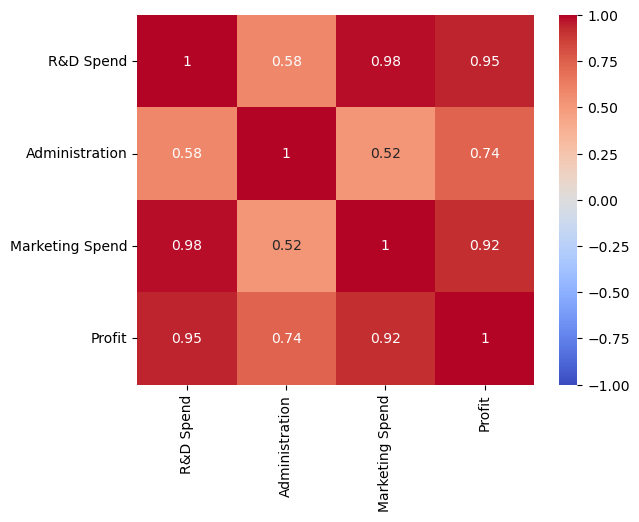

In [3]:
com_numeric = companies.select_dtypes(include=[np.number])

# Create a heatmap of the correlation matrix
sns.heatmap(com_numeric.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Show the plot
plt.show()

In [6]:
# Encoding categorical data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Assuming column 3 contains categorical data
categorical_column = [3]

# Using LabelEncoder for categorical column
labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])

# Using ColumnTransformer with OneHotEncoder for one-hot encoding
column_transformer = ColumnTransformer(
    transformers=[
        ("encoder", OneHotEncoder(), categorical_column)
    ],
    remainder="passthrough"
)

X = column_transformer.fit_transform(X)


In [5]:
X = X[:, 1:]

In [9]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [13]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(X_train, y_train)

LinearRegression()

In [14]:
# Predicting the test set results
y_pred = regressor.predict(X_test)
y_pred

array([ 89790.61532916,  88427.07187361,  94894.67836972, 175680.86725609,
        83411.73042089, 110571.90200074, 132145.22936439,  91473.37719687,
       164597.05380606,  53222.82667402,  66950.1905099 , 150566.43987004,
       126915.20858596,  59337.85971051, 177513.91053061,  75316.28143052,
       118248.14406603, 164574.40699901, 170937.2898107 , 182069.11645083,
       118845.0325269 ,  85669.95112229, 180992.59396142,  84145.08220145,
       105005.83769214, 101233.56772747,  53831.07669092,  56881.41475225,
        68896.39346906, 210040.00765882, 120778.72270894, 111724.87157655,
       101487.90541518, 137959.02649623,  63969.95996744, 108857.91214126,
       186014.72531987, 171442.64130746, 174644.26529204, 117671.49128195,
        96731.37857434, 165452.25779409, 107724.34331255,  50194.54176914,
       116513.89532179,  58632.48986821, 158416.46827609,  78541.4852161 ,
       159727.66671743, 131137.87699644, 184880.70924515, 174609.08266879,
        93745.66352059,  

In [15]:
print(regressor.coef_)

[ 5.26235224e+02 -3.54301375e+02 -1.71933849e+02  5.25845857e-01
  8.44390881e-01  1.07574255e-01]


In [16]:
print(regressor.intercept_)

-51561.464947763365


In [17]:
# Calculating the R squared value
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.911269589226882
